# Preparando o ambiente

## Instala√ß√µes - Estrutura, integridade, valores ausentes e duplicidades

### Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import seaborn as sb
import chardet
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive', True)
OutPath = "/content/drive/MyDrive/Colab Notebooks/5.SINANTB_Nacional_2001-2023/1.4 Resultados e-ou arquivos de sa√≠da/"

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



Mounted at /content/drive



### Datasets

In [ ]:
filePathAndName = "/content/drive/MyDrive/Colab Notebooks/5.SINANTB_Nacional_2001-2023/1.1 Base de dados/SINANTB_01a23.csv"

dfSINAN = pd.read_csv(filePathAndName, sep=';', encoding = "UTF-8", index_col=None)
dfSINAN = dfSINAN.loc[:, ~dfSINAN.columns.str.contains('^Unnamed')]

print(dfSINAN.columns.values)


<ipython-input-125-e69b5860767f>:3: DtypeWarning: Columns (8,17,20,21,32,37,38,43,44,46,47,49,58,60,61,66,76,81,87,96) have mixed types. Specify dtype option on import or set low_memory=False.
  dfSINAN = pd.read_csv(filePathAndName, sep=';', encoding = "UTF-8", index_col=None)


['TP_NOT' 'ID_AGRAVO' 'DT_NOTIFIC' 'NU_ANO' 'SG_UF_NOT' 'ID_MUNICIP'
 'ID_REGIONA' 'DT_DIAG' 'ANO_NASC' 'NU_IDADE_N' 'CS_SEXO' 'CS_GESTANT'
 'CS_RACA' 'CS_ESCOL_N' 'SG_UF' 'ID_MN_RESI' 'ID_RG_RESI' 'ID_PAIS'
 'NDUPLIC_N' 'IN_VINCULA' 'DT_DIGITA' 'DT_TRANSUS' 'DT_TRANSDM'
 'DT_TRANSSM' 'DT_TRANSRM' 'DT_TRANSRS' 'DT_TRANSSE' 'CS_FLXRET'
 'FLXRECEBI' 'MIGRADO_W' 'ID_OCUPA_N' 'TRATAMENTO' 'INSTITUCIO'
 'RAIOX_TORA' 'TESTE_TUBE' 'FORMA' 'EXTRAPU1_N' 'EXTRAPU2_N' 'EXTRAPUL_O'
 'AGRAVAIDS' 'AGRAVALCOO' 'AGRAVDIABE' 'AGRAVDOENC' 'AGRAVOUTRA'
 'AGRAVOUTDE' 'BACILOSC_E' 'BACILOS_E2' 'BACILOSC_O' 'CULTURA_ES'
 'CULTURA_OU' 'HIV' 'HISTOPATOL' 'DT_INIC_TR' 'RIFAMPICIN' 'ISONIAZIDA'
 'ETAMBUTOL' 'ESTREPTOMI' 'PIRAZINAMI' 'ETIONAMIDA' 'OUTRAS' 'OUTRAS_DES'
 'TRAT_SUPER' 'NU_CONTATO' 'DOENCA_TRA' 'SG_UF_AT' 'ID_MUNIC_A'
 'DT_NOTI_AT' 'SG_UF_2' 'ID_MUNIC_2' 'BACILOSC_1' 'BACILOSC_2'
 'BACILOSC_3' 'BACILOSC_4' 'BACILOSC_5' 'BACILOSC_6' 'TRATSUP_AT'
 'DT_MUDANCA' 'NU_COMU_EX' 'SITUA_9_M' 'SITUA_12_M' 'SI

# Pr√©-processamento

## Remo√ß√£o das linhas vazias

Essas linhas n√£o possu√≠am nenhum dos sintomas preenchidos, ent√£o por conta disso, resolvemos desconsider√°-las.

In [ ]:
base = dfSINAN
#N√£o devemos excluir os Situa_ence = NAN pois segundo jos√© m√°rio devemos consdierar como desfecho desfavor√°vel
# print(f'Shape ANTES remover linhas com NaN na coluna SITUA_ENCE: {base.shape}')
# base.dropna(subset=['SITUA_ENCE'], how='any', inplace = True)
# print(f'Shape AP√ìS remover linhas com NaN na coluna SITUA_ENCE: {base.shape}')
# #base.head()
base = base[base["ANO"] >= 2019] #√∫ltimos 5 anos, professor Walter solicita√ß√£o em 03/2025

# Linhas totalmente vazias: 39.364
# Linhas ap√≥s remo√ß√£o das linhas vazias: 2.052.347

In [ ]:
print(base.columns.values)

['TP_NOT' 'ID_AGRAVO' 'DT_NOTIFIC' 'NU_ANO' 'SG_UF_NOT' 'ID_MUNICIP'
 'ID_REGIONA' 'DT_DIAG' 'ANO_NASC' 'NU_IDADE_N' 'CS_SEXO' 'CS_GESTANT'
 'CS_RACA' 'CS_ESCOL_N' 'SG_UF' 'ID_MN_RESI' 'ID_RG_RESI' 'ID_PAIS'
 'NDUPLIC_N' 'IN_VINCULA' 'DT_DIGITA' 'DT_TRANSUS' 'DT_TRANSDM'
 'DT_TRANSSM' 'DT_TRANSRM' 'DT_TRANSRS' 'DT_TRANSSE' 'CS_FLXRET'
 'FLXRECEBI' 'MIGRADO_W' 'ID_OCUPA_N' 'TRATAMENTO' 'INSTITUCIO'
 'RAIOX_TORA' 'TESTE_TUBE' 'FORMA' 'EXTRAPU1_N' 'EXTRAPU2_N' 'EXTRAPUL_O'
 'AGRAVAIDS' 'AGRAVALCOO' 'AGRAVDIABE' 'AGRAVDOENC' 'AGRAVOUTRA'
 'AGRAVOUTDE' 'BACILOSC_E' 'BACILOS_E2' 'BACILOSC_O' 'CULTURA_ES'
 'CULTURA_OU' 'HIV' 'HISTOPATOL' 'DT_INIC_TR' 'RIFAMPICIN' 'ISONIAZIDA'
 'ETAMBUTOL' 'ESTREPTOMI' 'PIRAZINAMI' 'ETIONAMIDA' 'OUTRAS' 'OUTRAS_DES'
 'TRAT_SUPER' 'NU_CONTATO' 'DOENCA_TRA' 'SG_UF_AT' 'ID_MUNIC_A'
 'DT_NOTI_AT' 'SG_UF_2' 'ID_MUNIC_2' 'BACILOSC_1' 'BACILOSC_2'
 'BACILOSC_3' 'BACILOSC_4' 'BACILOSC_5' 'BACILOSC_6' 'TRATSUP_AT'
 'DT_MUDANCA' 'NU_COMU_EX' 'SITUA_9_M' 'SITUA_12_M' 'SI

In [ ]:
base.shape

(502533, 108)

In [ ]:
import pandas as pd

dataset = base

valor_ignorado = "Ignorado"

missing_counts = dataset.isna().sum() + (dataset == valor_ignorado).sum()

missing_data_report = pd.DataFrame({
    'Coluna': dataset.columns,
    'Registros Vazios (NaN + Ignorado)': missing_counts,
    'Percentual de Vazios (%)': (missing_counts / len(dataset)) * 100
})

missing_data_report = missing_data_report.sort_values(by='Percentual de Vazios (%)', ascending=False).reset_index(drop=True)

print(missing_data_report)

                    Coluna  Registros Vazios (NaN + Ignorado)  \
0               DT_TRANSSE                             502533   
1               DT_TRANSRS                             502533   
2               ID_OCUPA_N                             502533   
3                MIGRADO_W                             502533   
4                FLXRECEBI                             502533   
5               DT_TRANSUS                             502533   
6               DT_TRANSSM                             502533   
7               DT_TRANSDM                             502533   
8                CS_FLXRET                             502533   
9               DT_TRANSRM                             502533   
10              DT_MUDANCA                             502533   
11            IDADEminutos                             502533   
12              SITUA_12_M                             502530   
13              OUTRAS_DES                             502529   
14              INSTITUCI

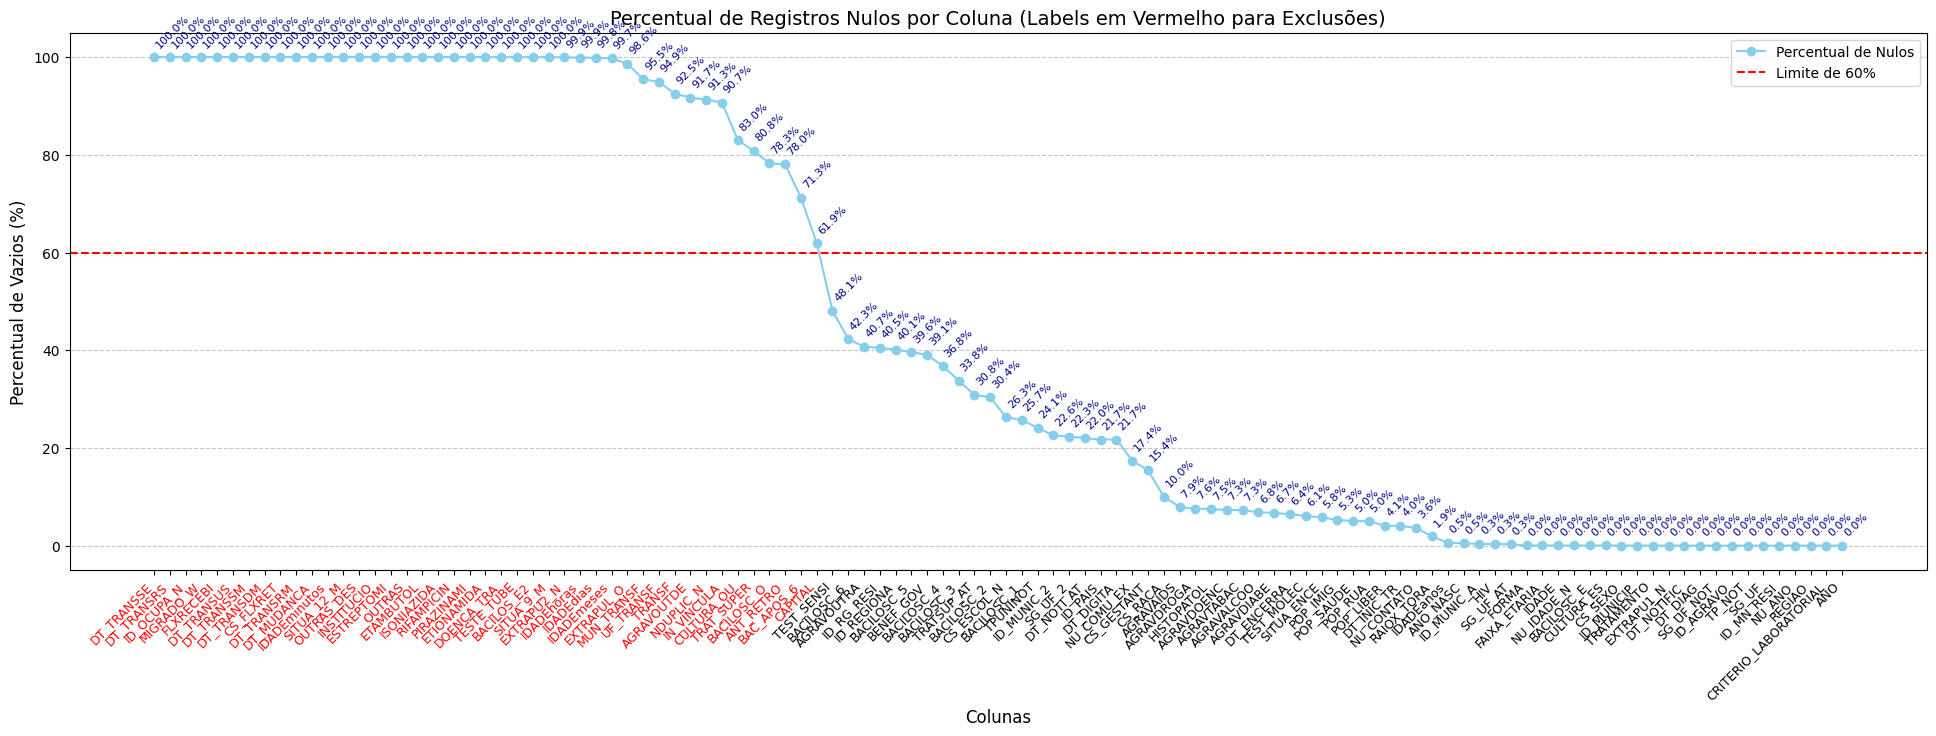

In [ ]:
import matplotlib.pyplot as plt  # Corrigido aqui
limite=60
plt.figure(figsize=(20, 8))

# Plotar o gr√°fico principal
plt.plot(missing_data_report['Coluna'], missing_data_report['Percentual de Vazios (%)'],
         marker='o', color='skyblue', label='Percentual de Nulos')

plt.axhline(limite, color='red', linestyle='--', label=f'Limite de {limite}%')

# Personalizar as labels do eixo X
x_labels = missing_data_report['Coluna']
x_colors = ['red' if valor > limite else 'black' for valor in missing_data_report['Percentual de Vazios (%)']]

# Adicionar as labels com cores personalizadas
plt.xticks(
    ticks=range(len(x_labels)),  # Posi√ß√£o das labels
    labels=x_labels,            # Textos das labels
    rotation=45,                # Rota√ß√£o das labels
    ha='right',                 # Alinhamento das labels
    fontsize=9
)

# Pinta individualmente as labels que excedem o limite
ax = plt.gca()
for tick_label, color in zip(ax.get_xticklabels(), x_colors):
    tick_label.set_color(color)

# Adicionar o percentual em cada ponto com rota√ß√£o e fonte menor
for i, valor in enumerate(missing_data_report['Percentual de Vazios (%)']):
    plt.text(i, valor + 2, f"{valor:.1f}%", rotation=45, ha='left', fontsize=8, color='darkblue')

# Configura√ß√µes do gr√°fico
plt.xlabel("Colunas", fontsize=12)
plt.ylabel("Percentual de Vazios (%)", fontsize=12)
plt.title("Percentual de Registros Nulos por Coluna (Labels em Vermelho para Exclus√µes)", fontsize=14)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3)

# Exibir o gr√°fico
plt.show()


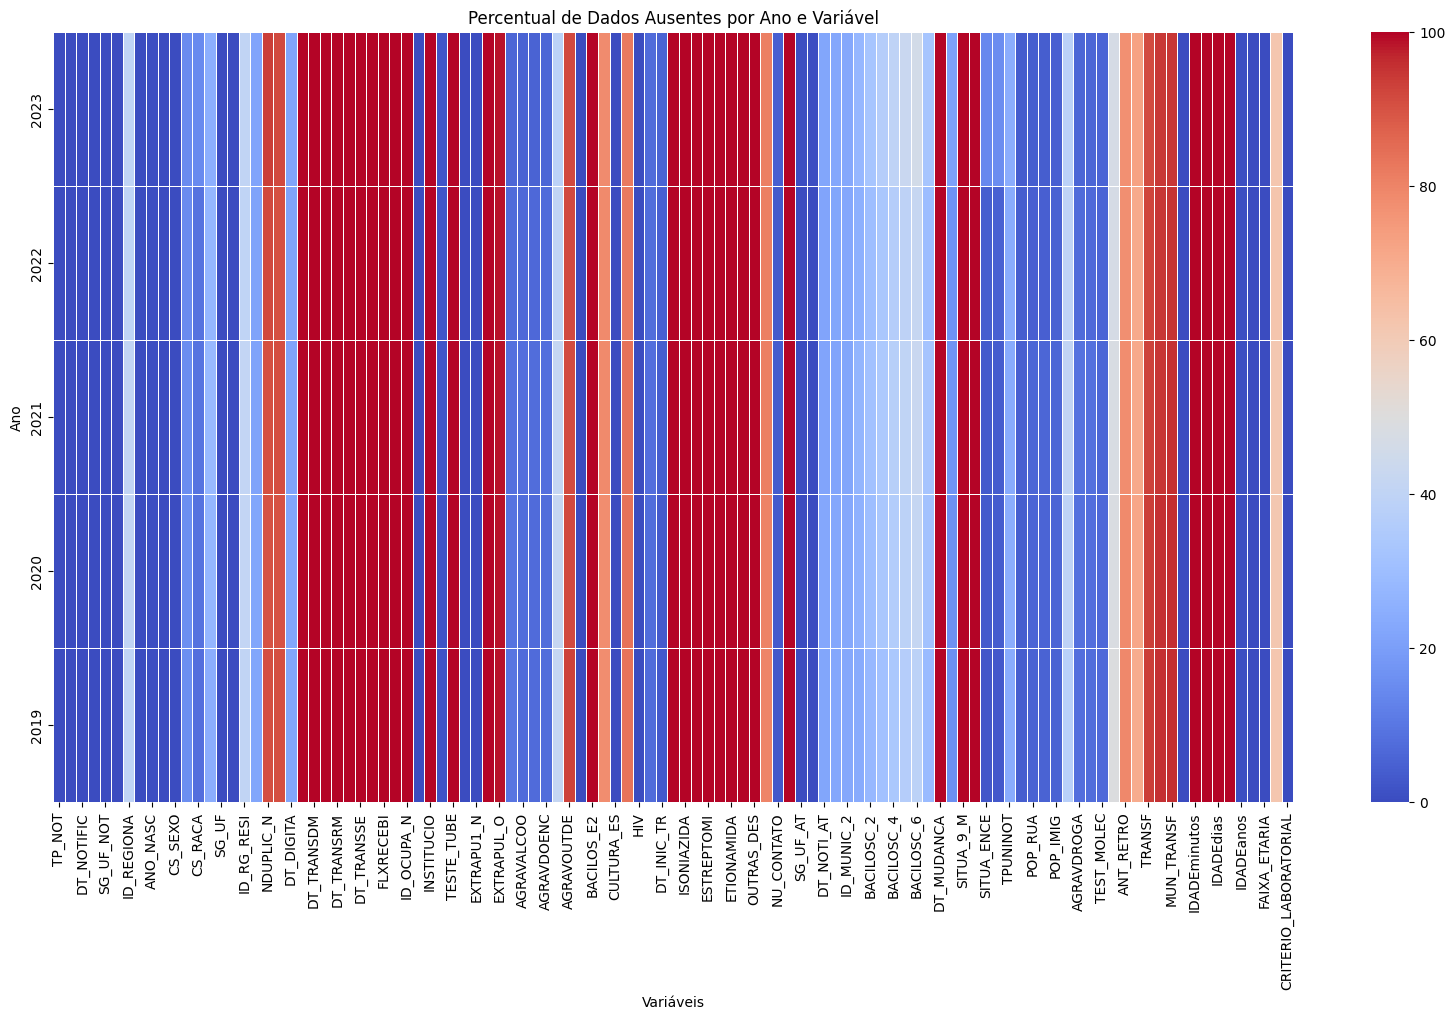

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que h√° uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a an√°lise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Fun√ß√£o para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicion√°rio
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicion√°rio

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que n√£o s√£o 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gr√°fico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolu√ß√£o da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspe√ß√£o
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar r√≥tulos
plt.xlabel("Vari√°veis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Vari√°vel")
plt.xticks(rotation=90)  # Rotaciona os r√≥tulos do eixo X

# Exibir o gr√°fico
plt.show()



## Remo√ß√£o das colunas vazias (+60% dados nulos)

---



In [ ]:
# Filtrar as colunas que t√™m mais de 60% de valores vazios ou "Ignorado"
colunas_vermelhas = missing_data_report.loc[
    missing_data_report['Percentual de Vazios (%)'] > 60, 'Coluna'
].tolist()

print(colunas_vermelhas)  # Exibir a lista


['DT_TRANSSE', 'DT_TRANSRS', 'ID_OCUPA_N', 'MIGRADO_W', 'FLXRECEBI', 'DT_TRANSUS', 'DT_TRANSSM', 'DT_TRANSDM', 'CS_FLXRET', 'DT_TRANSRM', 'DT_MUDANCA', 'IDADEminutos', 'SITUA_12_M', 'OUTRAS_DES', 'INSTITUCIO', 'ESTREPTOMI', 'OUTRAS', 'ETAMBUTOL', 'ISONIAZIDA', 'RIFAMPICIN', 'PIRAZINAMI', 'ETIONAMIDA', 'DOENCA_TRA', 'TESTE_TUBE', 'BACILOS_E2', 'SITUA_9_M', 'EXTRAPU2_N', 'IDADEhoras', 'IDADEdias', 'IDADEmeses', 'EXTRAPUL_O', 'MUN_TRANSF', 'UF_TRANSF', 'TRANSF', 'AGRAVOUTDE', 'NDUPLIC_N', 'IN_VINCULA', 'CULTURA_OU', 'TRAT_SUPER', 'BACILOSC_O', 'ANT_RETRO', 'BAC_APOS_6', 'CAPITAL']


In [ ]:
print(f'Shape ANTES remover as colunas vazias: {base.shape}')
colunas_vazias = colunas_vermelhas


base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape AP√ìS remover as colunas vazias: {base.shape}')
#base.head()


Shape ANTES remover as colunas vazias: (502533, 108)
Shape AP√ìS remover as colunas vazias: (502533, 65)


<ipython-input-133-8c99ad4042aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.drop(columns=colunas_vazias, inplace = True)


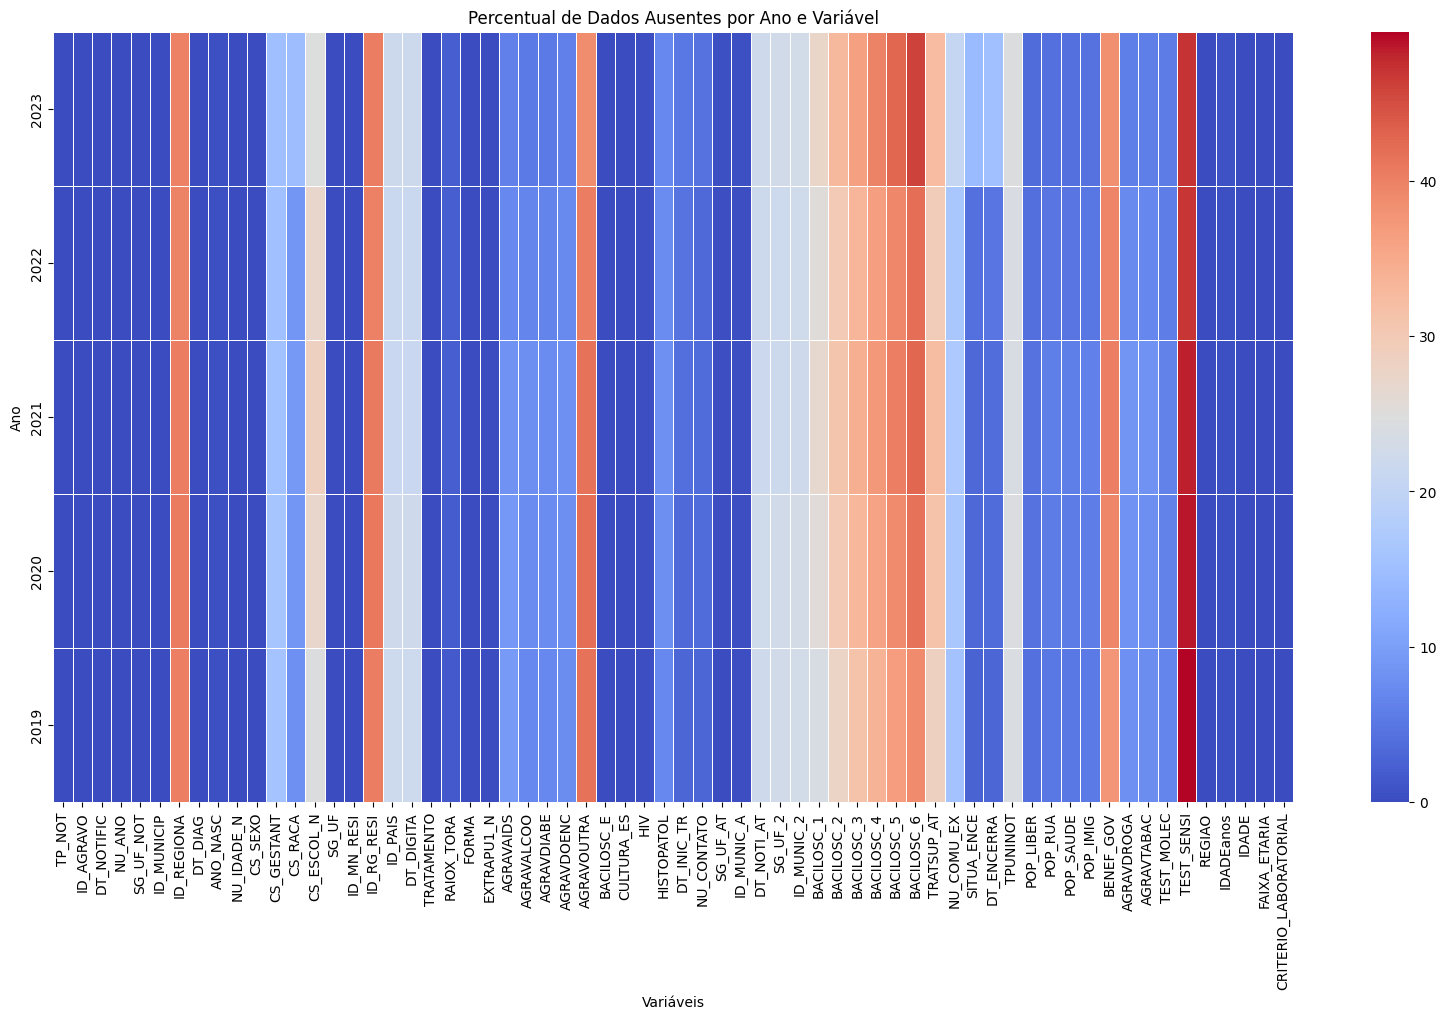

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que h√° uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a an√°lise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Fun√ß√£o para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicion√°rio
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicion√°rio

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que n√£o s√£o 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gr√°fico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolu√ß√£o da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspe√ß√£o
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar r√≥tulos
plt.xlabel("Vari√°veis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Vari√°vel")
plt.xticks(rotation=90)  # Rotaciona os r√≥tulos do eixo X

# Exibir o gr√°fico
plt.show()



In [ ]:
print(f'Shape ANTES remover as colunas com dados vazios ap√≥s o corte do ano do dataset: {base.shape}')
colunas_vazias = [
    'TEST_SENSI',
    ]


base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape ANTES remover as colunas com dados vazios ap√≥s o corte do ano do dataset: {base.shape}')
#base.head()


Shape ANTES remover as colunas com dados vazios ap√≥s o corte do ano do dataset: (502533, 65)
Shape ANTES remover as colunas com dados vazios ap√≥s o corte do ano do dataset: (502533, 64)


<ipython-input-135-a962669d4673>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.drop(columns=colunas_vazias, inplace = True)


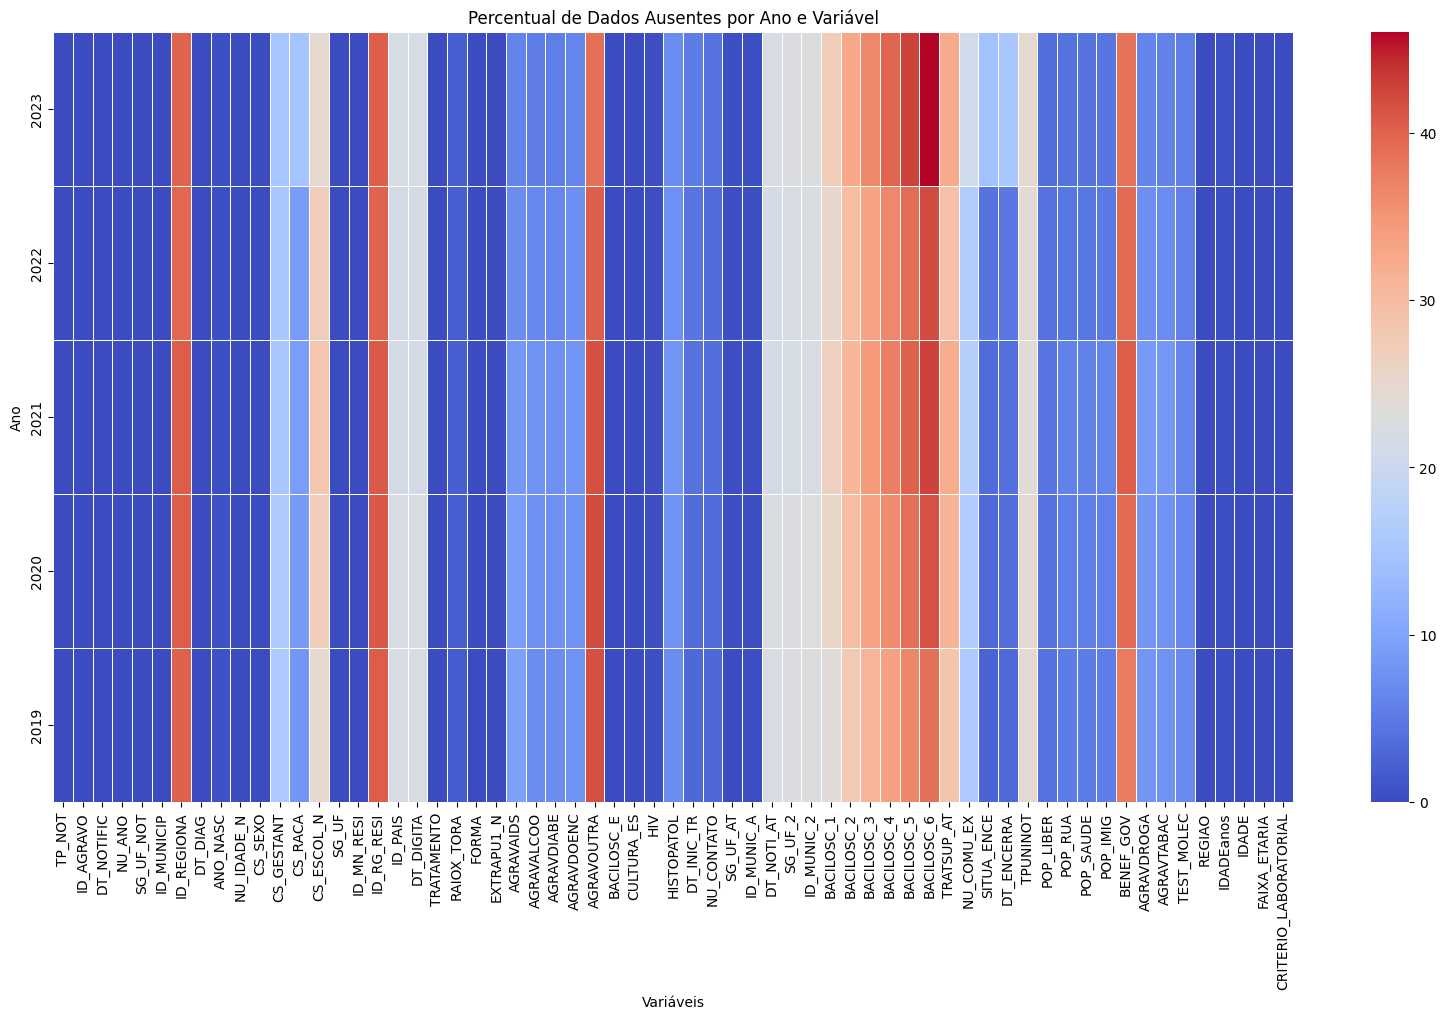

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que h√° uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a an√°lise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Fun√ß√£o para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicion√°rio
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicion√°rio

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que n√£o s√£o 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gr√°fico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolu√ß√£o da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspe√ß√£o
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar r√≥tulos
plt.xlabel("Vari√°veis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Vari√°vel")
plt.xticks(rotation=90)  # Rotaciona os r√≥tulos do eixo X

# Exibir o gr√°fico
plt.show()



In [ ]:
# base2 = base.dropna()  # Remove linhas com qualquer NaN
# #base = base[~base.isin(["Ignorado"]).any(axis=1)]  # Remove linhas que tenham "Ignorado"
# base2.shape

# # Contar a quantidade de registros de cada categoria
# contagem = base2['SITUA_ENCE'].value_counts()

# # Calcular o percentual de cada categoria
# percentual = base2['SITUA_ENCE'].value_counts(normalize=True) * 100

# # Criar um DataFrame com os resultados
# relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# # Exibir o relat√≥rio
# print(relatorio_situa_ence)


# Remo√ß√£o de colunas n√£o importantes para modelos de Classifica√ß√£o (IA)

In [ ]:
base.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_DIAG', 'ANO_NASC', 'NU_IDADE_N',
       'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI',
       'ID_RG_RESI', 'ID_PAIS', 'DT_DIGITA', 'TRATAMENTO', 'RAIOX_TORA',
       'FORMA', 'EXTRAPU1_N', 'AGRAVAIDS', 'AGRAVALCOO', 'AGRAVDIABE',
       'AGRAVDOENC', 'AGRAVOUTRA', 'BACILOSC_E', 'CULTURA_ES', 'HIV',
       'HISTOPATOL', 'DT_INIC_TR', 'NU_CONTATO', 'SG_UF_AT', 'ID_MUNIC_A',
       'DT_NOTI_AT', 'SG_UF_2', 'ID_MUNIC_2', 'BACILOSC_1', 'BACILOSC_2',
       'BACILOSC_3', 'BACILOSC_4', 'BACILOSC_5', 'BACILOSC_6', 'TRATSUP_AT',
       'NU_COMU_EX', 'SITUA_ENCE', 'DT_ENCERRA', 'TPUNINOT', 'POP_LIBER',
       'POP_RUA', 'POP_SAUDE', 'POP_IMIG', 'BENEF_GOV', 'AGRAVDROGA',
       'AGRAVTABAC', 'TEST_MOLEC', 'REGIAO', 'IDADEanos', 'IDADE',
       'FAIXA_ETARIA', 'CRITERIO_LABORATORIAL', 'ANO'],
      dtype='object')

In [ ]:
base.sample(2)

TP_NOT ID_AGRAVO  DT_NOTIFIC  NU_ANO       SG_UF_NOT  ID_MUNICIP  \
1793606  Individual      A169  2021-12-15    2021  Rio de Janeiro    330330.0   
2049982  Individual      A169  2023-07-07    2023          Paran√°    411800.0   

         ID_REGIONA     DT_DIAG ANO_NASC  NU_IDADE_N    CS_SEXO  \
1793606         NaN  2021-12-03   1977.0      4044.0  Masculino   
2049982       136.0  2023-07-03   1959.0      4063.0  Masculino   

            CS_GESTANT CS_RACA  \
1793606  N√£o se aplica   Preta   
2049982  N√£o se aplica  Branca   

                                                CS_ESCOL_N           SG_UF  \
1793606                                           Ignorado  Rio de Janeiro   
2049982  5a √† 8a s√©rie incompleta do EF (antigo gin√°sio...          Paran√°   

         ID_MN_RESI  ID_RG_RESI ID_PAIS   DT_DIGITA TRATAMENTO RAIOX_TORA  \
1793606      330170         NaN  BRASIL  2022-01-04  Caso Novo   Suspeito   
2049982      411800       136.0  BRASIL  2023-07-07  Caso Novo   Suspeito   

                            FORMA             EXTRAPU1_N AGRAVAIDS AGRAVALCOO  \
1793606  Pulmonar + Extrapulmonar  Ganglionar perif√©rico       Sim   Ignorado   
2049982                  Pulmonar                      .       N√£o        N√£o   

        AGRAVDIABE AGRAVDOENC AGRAVOUTRA BACILOSC_E     CULTURA_ES  \
1793606        N√£o        N√£o        NaN   Positiva       Positiva   
2049982        N√£o        N√£o        N√£o   Negativa  N√£o realizado   

                   HIV           HISTOPATOL  DT_INIC_TR  NU_CONTATO  SG_UF_AT  \
1793606       Positivo        N√£o realizado  2021-12-04         0.0      33.0   
2049982  N√£o realizado  N√£o sugestivo de TB  2023-07-07         2.0      41.0   

         ID_MUNIC_A  DT_NOTI_AT  SG_UF_2  ID_MUNIC_2  BACILOSC_1  BACILOSC_2  \
1793606    330455.0  2021-12-26     33.0    330170.0         NaN         NaN   
2049982    411800.0  2023-07-07     41.0    411800.0         2.0         NaN   

         BACILOSC_3  BACILOSC_4  BACILOSC_5  BACILOSC_6 TRATSUP_AT  \
1793606         NaN         NaN         NaN         NaN        NaN   
2049982         NaN         NaN         NaN         NaN        Sim   

         NU_COMU_EX SITUA_ENCE  DT_ENCERRA  TPUNINOT POP_LIBER   POP_RUA  \
1793606         0.0   Abandono  2021-12-26       0.0  Ignorado  Ignorado   
2049982         2.0       Cura  2023-09-06       0.0       N√£o       N√£o   

        POP_SAUDE  POP_IMIG BENEF_GOV AGRAVDROGA AGRAVTABAC     TEST_MOLEC  \
1793606  Ignorado  Ignorado  Ignorado   Ignorado   Ignorado  N√£o realizado   
2049982       N√£o       N√£o       N√£o        N√£o        Sim  N√£o realizado   

          REGIAO  IDADEanos  IDADE  FAIXA_ETARIA      CRITERIO_LABORATORIAL  \
1793606  Sudeste       44.0   44.0  40 a 44 anos  Com crit√©rio laboratorial   
2049982      Sul       63.0   63.0  60 a 64 anos  Sem crit√©rio laboratorial   

          ANO  
1793606  2021  
2049982  2023

In [ ]:
base2 = base

In [ ]:
print(f'Shape ANTES remover as colunas n√£o importantes para o contexto do problema e da IA classificativa: {base.shape}')
colunas_vazias = [
    'ID_AGRAVO',
    'DT_NOTIFIC',
    'NU_ANO',
    'ID_PAIS',
    #'DT_DIAG',
    'ANO_NASC',
    'NU_IDADE_N',
    'SG_UF',
    #'ID_MUNICIP',
    'ID_RG_RESI',
    #'NDUPLIC_N',
    #'IN_VINCULA',
    #'NU_CONTATO',
    'SG_UF_AT',
    'ID_MUNIC_A',
    'DT_NOTI_AT',
    'SG_UF_2',
    'ID_MUNIC_2',
    'DT_ENCERRA',
    'TPUNINOT',
    #'TRANSF',
    #'ANO', #deixar o ano apenas para gera√ß√£o de gr√°ficos.
    'TP_NOT',
    #'REGIAO',
    'IDADEanos',
    #'INSTITUCIO',
    #'DT_INIC_TR',
    #'DT_MUDANCA',
    #'NU_COMU_EX',
    'FAIXA_ETARIA',
    'CRITERIO_LABORATORIAL',
    'TP_NOT',
    'ID_AGRAVO',
    #'MIGRADO_W',
    'ID_MN_RESI', #o munic√≠pio poderia ser relevante, entretanto as caracter√≠sticas ficariam enormes usando one-hot-encoding, deixei somente a regi√£o
    'ID_REGIONA',
    'SG_UF_NOT',
    'CS_GESTANT',
    'DT_DIGITA'
    ]


base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape AP√ìS remover as colunas n√£o importantes para o contexto do problema e da IA classificativa: {base.shape}')
#base.head()


Shape ANTES remover as colunas n√£o importantes para o contexto do problema e da IA classificativa: (502533, 64)
Shape AP√ìS remover as colunas n√£o importantes para o contexto do problema e da IA classificativa: (502533, 40)


<ipython-input-141-50a69d06542f>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.drop(columns=colunas_vazias, inplace = True)


# Propor√ß√£o de contatos examinados

> Adicionar aspas



<ipython-input-142-ff29958cfcd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['NU_COMU_EX'] = pd.to_numeric(base['NU_COMU_EX'], errors='coerce')
<ipython-input-142-ff29958cfcd3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['NU_CONTATO'] = pd.to_numeric(base['NU_CONTATO'], errors='coerce')
<ipython-input-142-ff29958cfcd3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Estat√≠sticas ap√≥s remo√ß√£o dos outliers:
count    295232.000000
mean          0.700125
std           0.434804
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.200000
Name: PROP_CONTATOS_EXAMINADOS, dtype: float64


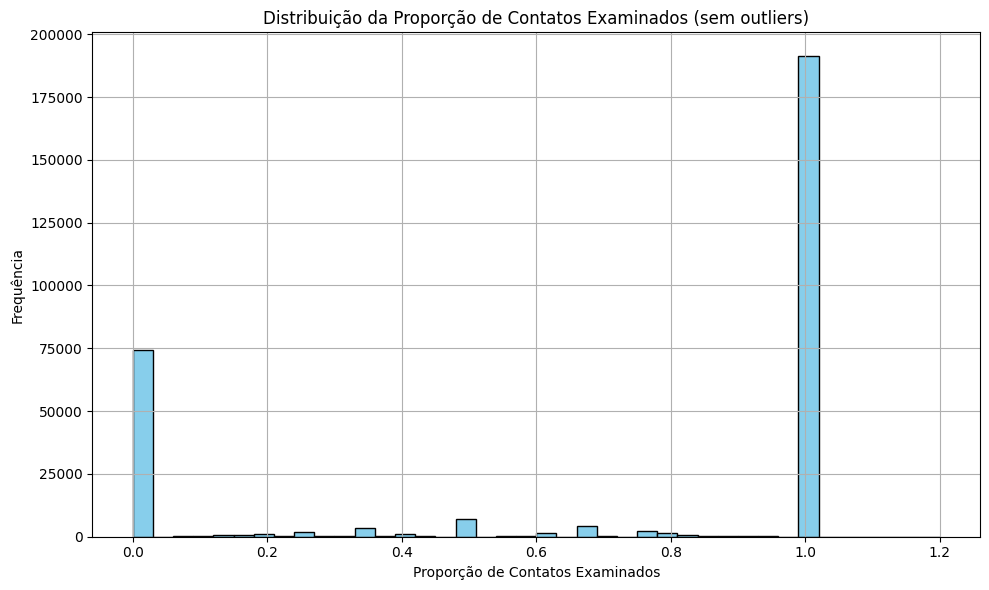

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir que os campos sejam num√©ricos
base['NU_COMU_EX'] = pd.to_numeric(base['NU_COMU_EX'], errors='coerce')
base['NU_CONTATO'] = pd.to_numeric(base['NU_CONTATO'], errors='coerce')

# Remover registros com n√∫mero de contatos zero ou ausente
base = base[base['NU_CONTATO'] > 0]

# Calcular a propor√ß√£o de contatos examinados
base['PROP_CONTATOS_EXAMINADOS'] = base['NU_COMU_EX'] / base['NU_CONTATO']

# Remover valores com propor√ß√£o negativa ou excessivamente altos (outliers)
limite_superior = 1.2  # Voc√™ pode ajustar esse valor conforme seu crit√©rio
base_filtrada = base[(base['PROP_CONTATOS_EXAMINADOS'] >= 0) &
                     (base['PROP_CONTATOS_EXAMINADOS'] <= limite_superior)]

# Exibir estat√≠sticas ap√≥s filtro
print("Estat√≠sticas ap√≥s remo√ß√£o dos outliers:")
print(base_filtrada['PROP_CONTATOS_EXAMINADOS'].describe())

# Plotar o histograma da base filtrada
plt.figure(figsize=(10, 6))
plt.hist(base_filtrada['PROP_CONTATOS_EXAMINADOS'], bins='auto', color='skyblue', edgecolor='black')
plt.title('Distribui√ß√£o da Propor√ß√£o de Contatos Examinados (sem outliers)')
plt.xlabel('Propor√ß√£o de Contatos Examinados')
plt.ylabel('Frequ√™ncia')
plt.grid(True)
plt.tight_layout()
plt.show()


# Dias entre o diagn√≥stico e o in√≠cio do tratamento (DIAS_ATE_INICIO_TRATAMENTO)

In [ ]:
# Convertendo as colunas para o tipo datetime (caso ainda n√£o estejam)
# Remover as linhas com datas fora do intervalo
base['DT_INIC_TR'] = pd.to_datetime(base['DT_INIC_TR'], errors='coerce', format='%Y-%m-%d')
base['DT_DIAG'] = pd.to_datetime(base['DT_DIAG'], errors='coerce', format='%Y-%m-%d')

base = base[base['DT_INIC_TR'].apply(pd.to_datetime, errors='coerce').notna()]
base = base[base['DT_DIAG'].apply(pd.to_datetime, errors='coerce').notna()]

base['DT_INIC_TR'] = pd.to_datetime(base['DT_INIC_TR'])
base['DT_DIAG'] = pd.to_datetime(base['DT_DIAG'])

print(f'Shape ANTES de remover os registros do SINAN com data de diagn√≥stico superior ao in√≠cio do tratamento indicando erro: {base.shape}')
# Calculando os dias em tratamento
base['DIAS_ATE_INICIO_TRATAMENTO'] = (base['DT_INIC_TR'] - base['DT_DIAG']).dt.days

# Removendo as linhas onde 'DIAS_ATE_INICIO_TRATAMENTO' √© negativo ou superior a 1800 dias
base = base[(base['DIAS_ATE_INICIO_TRATAMENTO'] >= 0)]

print(f'Shape DEPOIS de remover os registros do SINAN com data de diagn√≥stico superior ao in√≠cio do tratamento indicando  erro: {base.shape}')



<ipython-input-143-2c56adff8b12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['DT_INIC_TR'] = pd.to_datetime(base['DT_INIC_TR'], errors='coerce', format='%Y-%m-%d')
<ipython-input-143-2c56adff8b12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['DT_DIAG'] = pd.to_datetime(base['DT_DIAG'], errors='coerce', format='%Y-%m-%d')


Shape ANTES de remover os registros do SINAN com data de diagn√≥stico superior ao in√≠cio do tratamento indicando erro: (331122, 41)
Shape DEPOIS de remover os registros do SINAN com data de diagn√≥stico superior ao in√≠cio do tratamento indicando  erro: (330291, 42)


In [ ]:

base.sample(2)

ID_MUNICIP    DT_DIAG    CS_SEXO CS_RACA  \
1704500    330420.0 2020-02-07  Masculino   Parda   
1695537    330455.0 2020-11-30   Feminino   Parda   

                                                CS_ESCOL_N  \
1704500                                           Ignorado   
1695537  Ensino fundamental completo (antigo gin√°sio ou...   

                       TRATAMENTO RAIOX_TORA     FORMA EXTRAPU1_N AGRAVAIDS  \
1704500                 Caso Novo   Suspeito  Pulmonar          .       Sim   
1695537  Reingresso ap√≥s abandono   Suspeito  Pulmonar          .       N√£o   

        AGRAVALCOO AGRAVDIABE AGRAVDOENC AGRAVOUTRA BACILOSC_E     CULTURA_ES  \
1704500        Sim        N√£o        N√£o        NaN   Positiva       Positiva   
1695537        Sim        N√£o        N√£o        N√£o   Negativa  N√£o realizado   

              HIV     HISTOPATOL DT_INIC_TR  NU_CONTATO  BACILOSC_1  \
1704500  Positivo  N√£o realizado 2020-02-07         7.0         3.0   
1695537  Negativo  N√£o realizado 2020-11-30         1.0         2.0   

         BACILOSC_2  BACILOSC_3  BACILOSC_4  BACILOSC_5  BACILOSC_6  \
1704500         3.0         NaN         NaN         NaN         NaN   
1695537         3.0         3.0         3.0         3.0         3.0   

        TRATSUP_AT  NU_COMU_EX SITUA_ENCE POP_LIBER POP_RUA POP_SAUDE  \
1704500        N√£o         6.0   Abandono       N√£o     Sim       N√£o   
1695537        Sim         0.0   Abandono       N√£o     N√£o       N√£o   

        POP_IMIG BENEF_GOV AGRAVDROGA AGRAVTABAC  \
1704500      N√£o       N√£o        Sim   Ignorado   
1695537      N√£o       N√£o        Sim        Sim   

                                TEST_MOLEC   REGIAO  IDADE   ANO  \
1704500  Detect√°vel sens√≠vel √† Rifampicina  Sudeste   29.0  2020   
1695537                     N√£o detect√°vel  Sudeste   43.0  2020   

         PROP_CONTATOS_EXAMINADOS  DIAS_ATE_INICIO_TRATAMENTO  
1704500                  0.857143                           0  
1695537                  0.000000                           0

# Remo√ß√£o de colunas laboratoriais, medica√ß√µes e/ou futuras (exames com 1,2,3,4,56 meses)

In [ ]:
print(f'Shape ANTES remover as colunas laboratoriais, medica√ß√µes e/ou futuras: {base.shape}')
colunas_vazias = [
    #'RAIOX_TORA',
    #'TESTE_TUBE',
    #'FORMA',
    #'EXTRAPU1_N',
    #'EXTRAPU2_N',
    'BACILOSC_E',
    #'BACILOS_E2',
    #'BACILOSC_O',
    'CULTURA_ES',
    #'CULTURA_OU',
    'AGRAVAIDS',
    #'RIFAMPICIN',
    #'ISONIAZIDA',
    #'ETAMBUTOL',
    #'ESTREPTOMI',
    #'PIRAZINAMI',
    #'ETIONAMIDA',
    #'OUTRAS',
    'BACILOSC_1',
    'BACILOSC_2',
    'BACILOSC_3',
    'BACILOSC_4',
    'BACILOSC_5',
    'BACILOSC_6',
    'TRATSUP_AT',
    #'SITUA_9_M',
    #'TEST_MOLEC',
    #'TEST_SENSI',
    #'ANT_RETRO',
    #'BAC_APOS_6',
    'HISTOPATOL',
    #'HIV', solicitado para permanecer por Jos√© M√°rio em 04/04/2025
    'RAIOX_TORA',
    'FORMA',
    'TEST_MOLEC',
    'EXTRAPU1_N'
    ]

base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape ANTES remover as colunas laboratoriais, medica√ß√µes e/ou futuras: {base.shape}')
#base.head()


Shape ANTES remover as colunas laboratoriais, medica√ß√µes e/ou futuras: (330291, 42)
Shape ANTES remover as colunas laboratoriais, medica√ß√µes e/ou futuras: (330291, 27)


In [ ]:
base.sample(2)

ID_MUNICIP    DT_DIAG    CS_SEXO CS_RACA  \
2041039    330510.0 2023-05-24   Feminino   Parda   
1806702    280570.0 2021-02-08  Masculino  Branca   

                                                CS_ESCOL_N TRATAMENTO  \
2041039  5a √† 8a s√©rie incompleta do EF (antigo gin√°sio...  Caso Novo   
1806702                         Educa√ß√£o superior completa  Caso Novo   

        AGRAVALCOO AGRAVDIABE AGRAVDOENC AGRAVOUTRA       HIV DT_INIC_TR  \
2041039        N√£o        N√£o        N√£o   Ignorado  Negativo 2023-05-24   
1806702        N√£o        N√£o        N√£o        NaN  Negativo 2021-03-16   

         NU_CONTATO  NU_COMU_EX SITUA_ENCE POP_LIBER POP_RUA POP_SAUDE  \
2041039         4.0         4.0       Cura       N√£o     N√£o       N√£o   
1806702         3.0         1.0       Cura       N√£o     N√£o       N√£o   

        POP_IMIG BENEF_GOV AGRAVDROGA AGRAVTABAC    REGIAO  IDADE   ANO  \
2041039      N√£o       N√£o        N√£o        N√£o   Sudeste   29.0  2023   
1806702      N√£o       N√£o        N√£o        N√£o  Nordeste   35.0  2021   

         PROP_CONTATOS_EXAMINADOS  DIAS_ATE_INICIO_TRATAMENTO  
2041039                  1.000000                           0  
1806702                  0.333333                          36

In [ ]:
base.shape

(330291, 27)

# Verificando quantos registros vazios tem em cada coluna, ap√≥s o pr√©-processamento

In [ ]:
import pandas as pd

# Supondo que o dataset j√° esteja carregado
dataset = base

# Criar um DataFrame para armazenar os resultados
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categ√≥rica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores √∫nicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        # Adicionar informa√ß√µes ao DataFrame
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categ√≥rico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna num√©rica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Num√©rico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualiza√ß√£o
columns_info_df = pd.DataFrame(columns_info)

# Exibir o DataFrame gerado
columns_info_df


#columns_info_df.to_csv('columns_info.csv', index=False)



Coluna        Tipo  Percentual Nulos  \
0                   ID_MUNICIP    Num√©rico          0.000303   
1                      DT_DIAG        Data          0.000000   
2                      CS_SEXO  Categ√≥rico          0.000000   
3                      CS_RACA  Categ√≥rico          4.392490   
4                   CS_ESCOL_N  Categ√≥rico          7.435867   
5                   TRATAMENTO  Categ√≥rico          0.000000   
6                   AGRAVALCOO  Categ√≥rico          1.125674   
7                   AGRAVDIABE  Categ√≥rico          1.172300   
8                   AGRAVDOENC  Categ√≥rico          1.471733   
9                   AGRAVOUTRA  Categ√≥rico         31.198549   
10                         HIV  Categ√≥rico          0.229495   
11                  DT_INIC_TR        Data          0.000000   
12                  NU_CONTATO    Num√©rico          0.000000   
13                  NU_COMU_EX    Num√©rico         12.058760   
14                  SITUA_ENCE  Categ√≥rico          4.995292   
15                   POP_LIBER  Categ√≥rico          1.751183   
16                     POP_RUA  Categ√≥rico          2.064240   
17                   POP_SAUDE  Categ√≥rico          2.071507   
18                    POP_IMIG  Categ√≥rico          2.198667   
19                   BENEF_GOV  Categ√≥rico         24.019728   
20                  AGRAVDROGA  Categ√≥rico          1.550451   
21                  AGRAVTABAC  Categ√≥rico          1.582544   
22                      REGIAO  Categ√≥rico          0.000000   
23                       IDADE    Num√©rico          0.017560   
24                         ANO    Num√©rico          0.000000   
25    PROP_CONTATOS_EXAMINADOS    Num√©rico         12.058760   
26  DIAS_ATE_INICIO_TRATAMENTO    Num√©rico          0.000000   

                                      Info Categorias  \
0                                                None   
1                                                None   
2   {'Masculino': 67.30852490682459, 'Feminino': 3...   
3   {'Parda': 53.46139595861715, 'Branca': 26.7899...   
4   {'5a √† 8a s√©rie incompleta do EF (antigo gin√°s...   
5   {'Caso Novo': 81.38550550877862, 'Reingresso a...   
6   {'N√£o': 78.90088892835598, 'Sim': 17.823886236...   
7   {'N√£o': 87.25135485373094, 'Sim': 9.4960771278...   
8   {'N√£o': 94.05125526226838, 'Ignorado': 3.43361...   
9   {'N√£o': 78.38368280930274, 'Sim': 11.300138616...   
10  {'Negativo': 79.65666564501886, 'N√£o realizado...   
11                                               None   
12                                               None   
13                                               None   
14  {'Cura': 70.52219304507445, 'Abandono': 14.111...   
15  {'N√£o': 88.98821905228547, 'Sim': 9.5313814493...   
16  {'N√£o': 96.60033449468735, 'Ignorado': 1.81808...   
17  {'N√£o': 80.44359388960856, '3': 16.46132775182...   
18  {'N√£o': 94.34849502676231, '3': 3.108389649226...   
19  {'N√£o': 74.94819809050192, 'Ignorado': 14.0510...   
20  {'N√£o': 80.92936002706277, 'Sim': 15.339053418...   
21  {'N√£o': 71.63450889670958, 'Sim': 24.958162085...   
22  {'Sudeste': 42.1800775679628, 'Nordeste': 27.4...   
23                                               None   
24                                               None   
25                                               None   
26                                               None   

                                           Categorias  Qtd Categorias  
0                                                 NaN             NaN  
1                                                 NaN             NaN  
2                     [Masculino, Feminino, Ignorado]             3.0  
3   [Branca, Preta, Parda, Ignorado, Amarela, Ind√≠...             6.0  
4   [Ignorado, Ensino m√©dio incompleto (antigo col...            11.0  
5   [Caso Novo, Transfer√™ncia, Reingresso ap√≥s aba...             6.0  
6                                [Sim, N√£o, Ignorado]             3.0  
7            

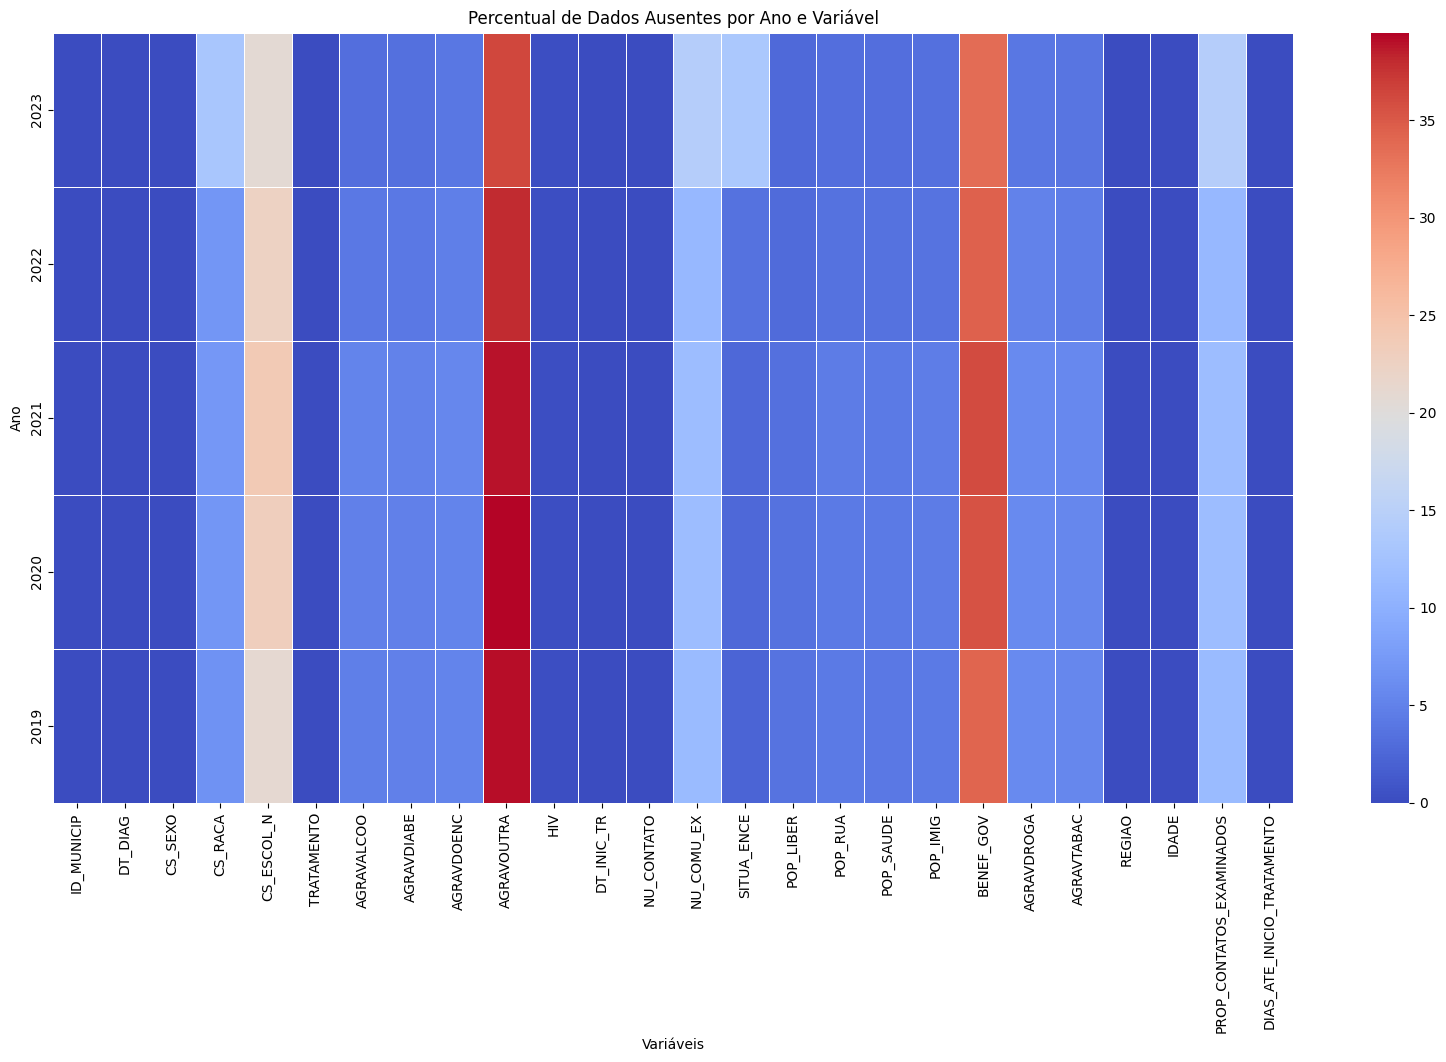

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que h√° uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a an√°lise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Fun√ß√£o para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicion√°rio
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicion√°rio

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que n√£o s√£o 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gr√°fico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolu√ß√£o da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspe√ß√£o
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar r√≥tulos
plt.xlabel("Vari√°veis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Vari√°vel")
plt.xticks(rotation=90)  # Rotaciona os r√≥tulos do eixo X

# Exibir o gr√°fico
plt.show()



Remover registros NaN em qualquer coluna.

In [ ]:
base['SITUA_ENCE'] = base['SITUA_ENCE'].fillna('Vazio') #substituir NaN por Vazio, que vai ser utilizado para agrupamento em desfavor√°vel segundo Jos√© M√°rio
base2 = base.dropna()  # Remove linhas com qualquer NaN
base2.shape

# Contar a quantidade de registros de cada categoria
contagem = base2['SITUA_ENCE'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['SITUA_ENCE'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relat√≥rio
print(relatorio_situa_ence)


                        Contagem  Percentual (%)
SITUA_ENCE                                      
Cura                      123294       69.384011
Abandono                   22792       12.826256
Transfer√™ncia              10027        5.642720
Vazio                       5204        2.928564
√ìbito por outra causa       4557        2.564463
√ìbito por TB                3917        2.204302
Mudan√ßa de diagn√≥stico      3595        2.023095
TB-DR                       1883        1.059663
Mudan√ßa de esquema          1158        0.651667
Abandono prim√°rio           1104        0.621279
Fal√™ncia                     167        0.093980


In [ ]:
base2.shape

(177698, 27)

In [ ]:
import pandas as pd

# Supondo que o dataset j√° esteja carregado
dataset = base2

# Criar um DataFrame para armazenar os resultados
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categ√≥rica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores √∫nicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        # Adicionar informa√ß√µes ao DataFrame
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categ√≥rico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna num√©rica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Num√©rico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualiza√ß√£o
columns_info_df = pd.DataFrame(columns_info)

# Exibir o DataFrame gerado
columns_info_df


#columns_info_df.to_csv('columns_info.csv', index=False)



Coluna        Tipo  Percentual Nulos  \
0                   ID_MUNICIP    Num√©rico               0.0   
1                      DT_DIAG        Data               0.0   
2                      CS_SEXO  Categ√≥rico               0.0   
3                      CS_RACA  Categ√≥rico               0.0   
4                   CS_ESCOL_N  Categ√≥rico               0.0   
5                   TRATAMENTO  Categ√≥rico               0.0   
6                   AGRAVALCOO  Categ√≥rico               0.0   
7                   AGRAVDIABE  Categ√≥rico               0.0   
8                   AGRAVDOENC  Categ√≥rico               0.0   
9                   AGRAVOUTRA  Categ√≥rico               0.0   
10                         HIV  Categ√≥rico               0.0   
11                  DT_INIC_TR        Data               0.0   
12                  NU_CONTATO    Num√©rico               0.0   
13                  NU_COMU_EX    Num√©rico               0.0   
14                  SITUA_ENCE  Categ√≥rico               0.0   
15                   POP_LIBER  Categ√≥rico               0.0   
16                     POP_RUA  Categ√≥rico               0.0   
17                   POP_SAUDE  Categ√≥rico               0.0   
18                    POP_IMIG  Categ√≥rico               0.0   
19                   BENEF_GOV  Categ√≥rico               0.0   
20                  AGRAVDROGA  Categ√≥rico               0.0   
21                  AGRAVTABAC  Categ√≥rico               0.0   
22                      REGIAO  Categ√≥rico               0.0   
23                       IDADE    Num√©rico               0.0   
24                         ANO    Num√©rico               0.0   
25    PROP_CONTATOS_EXAMINADOS    Num√©rico               0.0   
26  DIAS_ATE_INICIO_TRATAMENTO    Num√©rico               0.0   

                                      Info Categorias  \
0                                                None   
1                                                None   
2   {'Masculino': 66.60232529347545, 'Feminino': 3...   
3   {'Parda': 54.56504856554378, 'Branca': 24.9366...   
4   {'Ignorado': 19.064930387511396, '5a √† 8a s√©ri...   
5   {'Caso Novo': 81.52764803205439, 'Reingresso a...   
6   {'N√£o': 79.07854899886324, 'Sim': 16.849936408...   
7   {'N√£o': 86.29922677801663, 'Sim': 9.7198617879...   
8   {'N√£o': 93.18112753097952, 'Ignorado': 4.19869...   
9   {'N√£o': 78.66717689563191, 'Sim': 10.844804105...   
10  {'Negativo': 80.67338968362053, 'N√£o realizado...   
11                                               None   
12                                               None   
13                                               None   
14  {'Cura': 69.38401107496989, 'Abandono': 12.826...   
15  {'N√£o': 88.71737442177177, 'Sim': 9.6213800943...   
16  {'N√£o': 96.27739197965087, 'Ignorado': 2.15984...   
17  {'N√£o': 96.32972796542448, 'Ignorado': 2.12776...   
18  {'N√£o': 97.18342356132314, 'Ignorado': 2.23131...   
19  {'N√£o': 76.36214251145202, 'Ignorado': 12.7998...   
20  {'N√£o': 81.21025560220149, 'Sim': 14.266902272...   
21  {'N√£o': 71.83029634548504, 'Sim': 23.976634514...   
22  {'Sudeste': 31.129781989667865, 'Nordeste': 29...   
23                                               None   
24                                               None   
25                                               None   
26                                               None   

                                           Categorias  Qtd Categorias  
0                                                 NaN             NaN  
1                                                 NaN             NaN  
2                     [Masculino, Feminino, Ignorado]             3.0  
3   [Branca, Parda, Preta, Ignorado, Amarela, Ind√≠...             6.0  
4   [Ignorado, Ensino m√©dio incompleto (antigo col...            11.0  
5   [Caso Novo, Transfer√™ncia, Reingresso ap√≥s aba...             6.0  
6                                [Sim, N√£o, Ignorado]             3.0  
7             

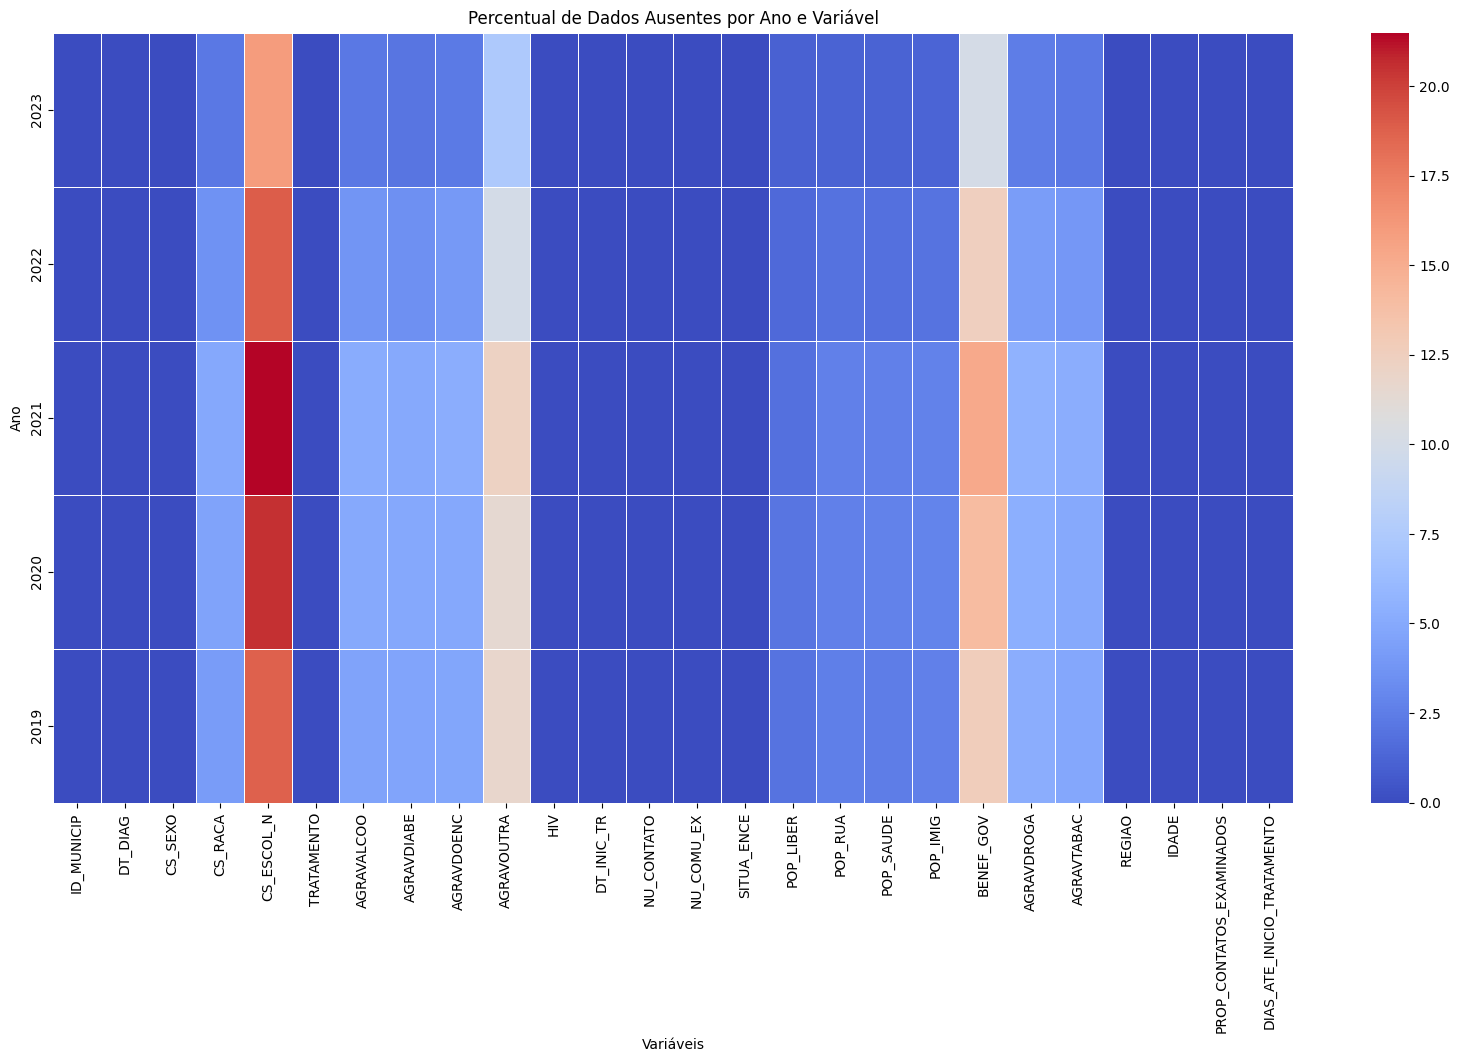

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base2

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que h√° uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a an√°lise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Fun√ß√£o para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicion√°rio
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicion√°rio

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que n√£o s√£o 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gr√°fico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolu√ß√£o da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspe√ß√£o
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar r√≥tulos
plt.xlabel("Vari√°veis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Vari√°vel")
plt.xticks(rotation=90)  # Rotaciona os r√≥tulos do eixo X

# Exibir o gr√°fico
plt.show()



In [ ]:
valores_para_remover = ['√ìbito por outra causa', 'Mudan√ßa de diagn√≥stico', 'TB-DR', 'Mudan√ßa de esquema']
base2 = base2[~base2['SITUA_ENCE'].isin(valores_para_remover)]

In [ ]:
base2.shape

(166505, 27)

In [ ]:
# Contar a quantidade de registros de cada categoria
contagem = base2['SITUA_ENCE'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['SITUA_ENCE'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relat√≥rio
print(relatorio_situa_ence)


                   Contagem  Percentual (%)
SITUA_ENCE                                 
Cura                 123294       74.048227
Abandono              22792       13.688478
Transfer√™ncia         10027        6.022041
Vazio                  5204        3.125432
√ìbito por TB           3917        2.352482
Abandono prim√°rio      1104        0.663043
Fal√™ncia                167        0.100297


In [ ]:

# Definindo os crit√©rios para as categorias
favoravel = ['Cura']
desfavoravel = ['Abandono', '√ìbito por TB', 'Ignorado', 'Abandono prim√°rio', 'Mudan√ßa de esquema', 'Fal√™ncia', 'Vazio', 'Transfer√™ncia']

# Criando a nova coluna 'DESFECHO' com base nos valores da coluna 'SITUA_ENCE'
base2['DESFECHO'] = base2['SITUA_ENCE'].apply(lambda x: 'Favor√°vel' if x in favoravel else ('Desfavor√°vel' if x in desfavoravel else 'Outros'))



In [ ]:
# Verificando o resultado
print(base2[['SITUA_ENCE', 'DESFECHO']].sample(5))

            SITUA_ENCE      DESFECHO
1948991           Cura     Favor√°vel
1829740           Cura     Favor√°vel
1890900  Transfer√™ncia  Desfavor√°vel
2046546           Cura     Favor√°vel
2013505  Transfer√™ncia  Desfavor√°vel


In [ ]:
# Contar a quantidade de registros de cada categoria
contagem = base2['DESFECHO'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['DESFECHO'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relat√≥rio
print(relatorio_situa_ence)


              Contagem  Percentual (%)
DESFECHO                              
Favor√°vel       123294       74.048227
Desfavor√°vel     43211       25.951773


In [ ]:
# Contar a quantidade de registros de cada categoria
contagem = base2['REGIAO'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['REGIAO'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relat√≥rio
print(relatorio_situa_ence)


              Contagem  Percentual (%)
REGIAO                                
Sudeste          51723       31.063932
Nordeste         50385       30.260353
Norte            30702       18.439086
Sul              23464       14.092069
Centro-Oeste     10231        6.144560


In [ ]:
import pandas as pd

# Supondo que o dataset j√° esteja carregado
dataset = base2

# Criar um DataFrame para armazenar os resultados
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categ√≥rica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores √∫nicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        # Adicionar informa√ß√µes ao DataFrame
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categ√≥rico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna num√©rica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Num√©rico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualiza√ß√£o
columns_info_df = pd.DataFrame(columns_info)

# Exibir o DataFrame gerado
columns_info_df


#columns_info_df.to_csv('columns_info.csv', index=False)



Coluna        Tipo  Percentual Nulos  \
0                   ID_MUNICIP    Num√©rico               0.0   
1                      DT_DIAG        Data               0.0   
2                      CS_SEXO  Categ√≥rico               0.0   
3                      CS_RACA  Categ√≥rico               0.0   
4                   CS_ESCOL_N  Categ√≥rico               0.0   
5                   TRATAMENTO  Categ√≥rico               0.0   
6                   AGRAVALCOO  Categ√≥rico               0.0   
7                   AGRAVDIABE  Categ√≥rico               0.0   
8                   AGRAVDOENC  Categ√≥rico               0.0   
9                   AGRAVOUTRA  Categ√≥rico               0.0   
10                         HIV  Categ√≥rico               0.0   
11                  DT_INIC_TR        Data               0.0   
12                  NU_CONTATO    Num√©rico               0.0   
13                  NU_COMU_EX    Num√©rico               0.0   
14                  SITUA_ENCE  Categ√≥rico               0.0   
15                   POP_LIBER  Categ√≥rico               0.0   
16                     POP_RUA  Categ√≥rico               0.0   
17                   POP_SAUDE  Categ√≥rico               0.0   
18                    POP_IMIG  Categ√≥rico               0.0   
19                   BENEF_GOV  Categ√≥rico               0.0   
20                  AGRAVDROGA  Categ√≥rico               0.0   
21                  AGRAVTABAC  Categ√≥rico               0.0   
22                      REGIAO  Categ√≥rico               0.0   
23                       IDADE    Num√©rico               0.0   
24                         ANO    Num√©rico               0.0   
25    PROP_CONTATOS_EXAMINADOS    Num√©rico               0.0   
26  DIAS_ATE_INICIO_TRATAMENTO    Num√©rico               0.0   
27                    DESFECHO  Categ√≥rico               0.0   

                                      Info Categorias  \
0                                                None   
1                                                None   
2   {'Masculino': 66.82081619170596, 'Feminino': 3...   
3   {'Parda': 54.86561965106153, 'Branca': 24.5097...   
4   {'Ignorado': 19.022852166601602, '5a √† 8a s√©ri...   
5   {'Caso Novo': 81.68763700789766, 'Reingresso a...   
6   {'N√£o': 79.05768595537671, 'Sim': 16.869163088...   
7   {'N√£o': 86.50130626707907, 'Sim': 9.5012161796...   
8   {'N√£o': 93.2116152668088, 'Ignorado': 4.214287...   
9   {'N√£o': 79.19341761508663, 'Ignorado': 10.6140...   
10  {'Negativo': 81.4930482568091, 'N√£o realizado'...   
11                                               None   
12                                               None   
13                                               None   
14  {'Cura': 74.04822677997657, 'Abandono': 13.688...   
15  {'N√£o': 88.30425512747365, 'Sim': 10.034533497...   
16  {'N√£o': 96.26617819284706, 'Ignorado': 2.17891...   
17  {'N√£o': 96.31902945857482, 'Ignorado': 2.14588...   
18  {'N√£o': 97.15804330200294, 'Ignorado': 2.25038...   
19  {'N√£o': 76.40791567820786, 'Ignorado': 12.7263...   
20  {'N√£o': 80.95432569592505, 'Sim': 14.516681180...   
21  {'N√£o': 71.80625206450256, 'Sim': 23.994474640...   
22  {'Sudeste': 31.06393201405363, 'Nordeste': 30....   
23                                               None   
24                                               None   
25                                               None   
26                                               None   
27  {'Favor√°vel': 74.04822677997657, 'Desfavor√°vel...   

                                           Categorias  Qtd Categorias  
0                                                 NaN             NaN  
1                                                 NaN             NaN  
2                     [Masculino, Feminino, Ignorado]             3.0  
3   [Branca, Parda, Preta, Ignorado, Amarela, Ind√≠...             6.0  
4   [Ignorado, Ensino m√©dio incompleto (antigo col...            11.0  
5   [Caso Novo, Transfer√™ncia, Reing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import shutil

# Montar o Google Drive (caso ainda n√£o esteja montado)
from google.colab import drive
drive.mount('/content/drive')

# Definir o caminho onde o arquivo ZIP ser√° salvo no Google Drive
OutPath = "/content/drive/MyDrive/Colab Notebooks/5.SINANTB_Nacional_2001-2023/1.4 Resultados e-ou arquivos de sa√≠da/"

# Criar uma pasta tempor√°ria para salvar os gr√°ficos
temp_folder = "plots_temp2"
os.makedirs(temp_folder, exist_ok=True)

# Supondo que o dataset j√° esteja carregado e seja chamado "base2"
dataset = base2

# ---------------------------
# An√°lise das Colunas do Dataset
# ---------------------------
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categ√≥rica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores √∫nicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categ√≥rico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna num√©rica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Num√©rico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualiza√ß√£o e salvar em CSV
columns_info_df = pd.DataFrame(columns_info)
print("Informa√ß√µes das colunas:")
print(columns_info_df)

# Salvar o DataFrame em um arquivo CSV
columns_info_csv = os.path.join(OutPath, "columns_info.csv")
columns_info_df.to_csv(columns_info_csv, index=False)
print(f"Arquivo CSV salvo em: {columns_info_csv}")

# ---------------------------
# Gerar gr√°ficos para cada coluna em rela√ß√£o ao DESFECHO
# ---------------------------
for column in dataset.columns:
    if column == "DESFECHO":
        continue  # N√£o queremos um gr√°fico da pr√≥pria vari√°vel alvo

    plt.figure(figsize=(8, 5))

    if dataset[column].dtype in ['object', 'category']:
        # Para colunas categ√≥ricas, usamos countplot
        sns.countplot(x=column, hue="DESFECHO", data=dataset, palette="Set2")
        plt.xticks(rotation=45)
        plt.title(f"Distribui√ß√£o de {column} por DESFECHO")

    elif np.issubdtype(dataset[column].dtype, np.number):
        # Para colunas num√©ricas, usamos histogramas
        sns.histplot(data=dataset, x=column, hue="DESFECHO", kde=True, bins=30, palette="Set1")
        plt.title(f"Distribui√ß√£o de {column} por DESFECHO")

    elif np.issubdtype(dataset[column].dtype, np.datetime64):
        # Se for data, converte para ano e plota
        dataset["year"] = dataset[column].dt.year
        sns.countplot(x="year", hue="DESFECHO", data=dataset, palette="Set3")
        plt.xticks(rotation=45)
        plt.title(f"Distribui√ß√£o de {column} (Ano) por DESFECHO")

    # Salvar gr√°fico na pasta tempor√°ria
    plot_filename = os.path.join(temp_folder, f"{column}.png")
    plt.savefig(plot_filename, bbox_inches='tight')
    plt.close()

print(f"Gr√°ficos salvos na pasta tempor√°ria: {temp_folder}")

# ===============================
# Compactando as imagens em um arquivo ZIP na pasta OutPath
# ===============================
zip_filename = os.path.join(OutPath, "plots.zip")
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(temp_folder):
        for file in files:
            file_path = os.path.join(root, file)
            # arcname=file garante que o arquivo seja salvo no zip sem o caminho completo
            zipf.write(file_path, arcname=file)

print(f"Arquivo ZIP salvo em: {zip_filename}")

# Remover a pasta tempor√°ria ap√≥s a compacta√ß√£o
shutil.rmtree(temp_folder)
print("Pasta tempor√°ria removida.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Informa√ß√µes das colunas:
                        Coluna        Tipo  Percentual Nulos  \
0                   ID_MUNICIP    Num√©rico               0.0   
1                      DT_DIAG        Data               0.0   
2                      CS_SEXO  Categ√≥rico               0.0   
3                      CS_RACA  Categ√≥rico               0.0   
4                   CS_ESCOL_N  Categ√≥rico               0.0   
5                   TRATAMENTO  Categ√≥rico               0.0   
6                   AGRAVALCOO  Categ√≥rico               0.0   
7                   AGRAVDIABE  Categ√≥rico               0.0   
8                   AGRAVDOENC  Categ√≥rico               0.0   
9                   AGRAVOUTRA  Categ√≥rico               0.0   
10                         HIV  Categ√≥rico               0.0   
11                  DT_INIC_TR        Data               0.0   
12

In [ ]:
#fazer analise de quais colunas vao sair, e documentar.

In [ ]:

colunas_vazias = [
    'ANO',
    'SITUA_ENCE'
    ]

base2.drop(columns=colunas_vazias, inplace = True)
print(f'{base2.shape}')



(166505, 27)


# Transforma√ß√£o dos dados - texto > categoria

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = base2

# Criar um LabelEncoder para cada coluna categ√≥rica
label_encoders = {}
mappings = {}  # Dicion√°rio para armazenar a mapea√ß√£o de cada coluna

for col in df.select_dtypes(include=['object']).columns:  # Seleciona colunas categ√≥ricas
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Aplica o encoder
    label_encoders[col] = le  # Salva o encoder caso precise reverter depois
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Armazena a mapea√ß√£o original -> c√≥digo

# Exibir resumo das transforma√ß√µes corretamente
print("\nResumo das transforma√ß√µes categ√≥ricas:\n")
for col, mapping in mappings.items():
    print(f"Coluna: {col}")
    for original, encoded in mapping.items():  # Agora usamos o mapeamento correto
        print(f"  {encoded} -> {original}")
    print("-" * 40)  # Separador visual para cada coluna



Resumo das transforma√ß√µes categ√≥ricas:

Coluna: CS_SEXO
  0 -> Feminino
  1 -> Ignorado
  2 -> Masculino
----------------------------------------
Coluna: CS_RACA
  0 -> Amarela
  1 -> Branca
  2 -> Ignorado
  3 -> Ind√≠gena
  4 -> Parda
  5 -> Preta
----------------------------------------
Coluna: CS_ESCOL_N
  0 -> 1a a 4a s√©rie incompleta do EF
  1 -> 4a s√©rie completa do EF (antigo 1o grau)
  2 -> 5a √† 8a s√©rie incompleta do EF (antigo gin√°sio ou 1o grau)
  3 -> Analfabeto
  4 -> Educa√ß√£o superior completa
  5 -> Educa√ß√£o superior incompleta
  6 -> Ensino fundamental completo (antigo gin√°sio ou 1o grau)
  7 -> Ensino m√©dio completo (antigo colegial ou 2o grau)
  8 -> Ensino m√©dio incompleto (antigo colegial ou 2o grau)
  9 -> Ignorado
  10 -> N√£o se aplica
----------------------------------------
Coluna: TRATAMENTO
  0 -> Caso Novo
  1 -> N√£o sabe
  2 -> P√≥s-√≥bito
  3 -> Recidiva
  4 -> Reingresso ap√≥s abandono
  5 -> Transfer√™ncia
------------------------------

In [ ]:
import pickle

# Salvar o mapeamento em um arquivo pickle
with open(OutPath+'mappings_labels5anosEspecialistaELiteraturaDias_.pkl', 'wb') as f:
    pickle.dump(mappings, f)


**LEMBRAR DE NORMALIZAR DIAS_EM_TRATAMENTO e salvar a NORMALIZACAO (INDICES DE NORMALIZACAO)**

In [ ]:
from datetime import datetime

now = datetime.now()  # current date and time
date_time = now.strftime("%m-%d-%Y_%H-%M-%S")

print("date and time:", date_time)
df.to_csv(OutPath + 'Sinantb_desfechos5anosEspecialistasELiteraturaDias_' + date_time + '.csv', encoding='utf-8', index=False)


date and time: 05-10-2025_16-17-15


In [ ]:
!pip install lifelines

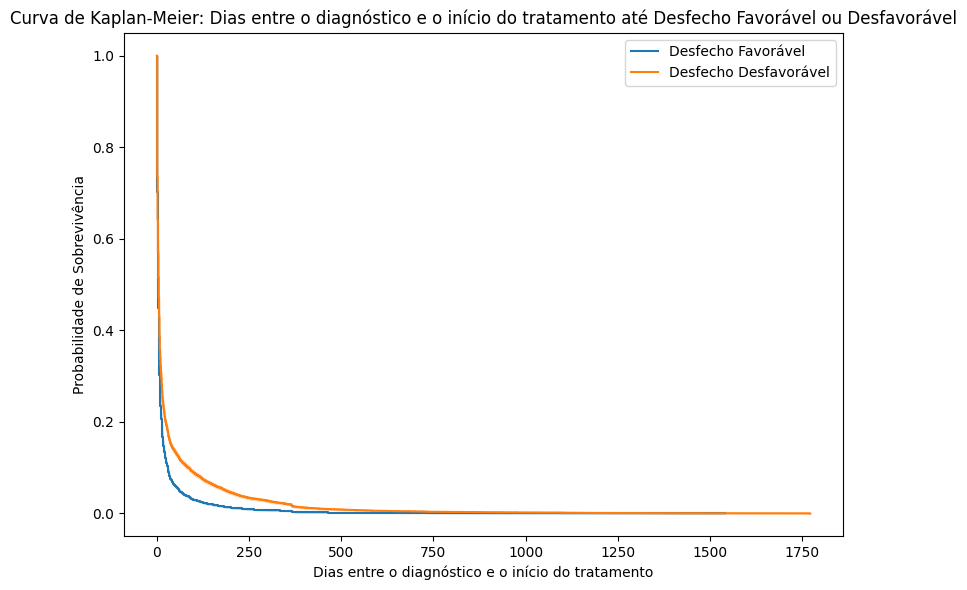

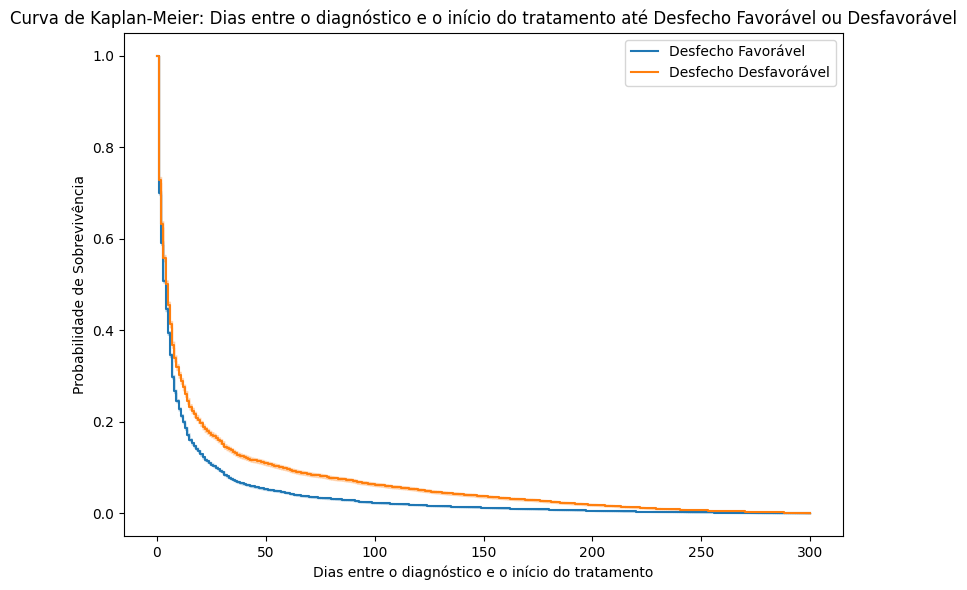

Curvas de Kaplan-Meier geradas e exibidas na tela.


In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Filtrar os dados para o desfecho favor√°vel (1) e desfavor√°vel (0), removendo registros com DIAS = 0
df_favoravel = df[(df["DESFECHO"] == 1) & (df["DIAS_ATE_INICIO_TRATAMENTO"] > 0)]
df_desfavoravel = df[(df["DESFECHO"] == 0) & (df["DIAS_ATE_INICIO_TRATAMENTO"] > 0)]

# Criando o Kaplan-Meier Fitter
kmf_favoravel = KaplanMeierFitter()
kmf_desfavoravel = KaplanMeierFitter()

# Ajustando o Kaplan-Meier para os pacientes com desfecho favor√°vel (1)
plt.figure(figsize=(8, 6))
kmf_favoravel.fit(df_favoravel["DIAS_ATE_INICIO_TRATAMENTO"], label="Desfecho Favor√°vel")
kmf_favoravel.plot()

# Ajustando o Kaplan-Meier para os pacientes com desfecho desfavor√°vel (0)
kmf_desfavoravel.fit(df_desfavoravel["DIAS_ATE_INICIO_TRATAMENTO"], label="Desfecho Desfavor√°vel")
kmf_desfavoravel.plot()

plt.title("Curva de Kaplan-Meier: Dias entre o diagn√≥stico e o in√≠cio do tratamento at√© Desfecho Favor√°vel ou Desfavor√°vel")
plt.xlabel("Dias entre o diagn√≥stico e o in√≠cio do tratamento")
plt.ylabel("Probabilidade de Sobreviv√™ncia")
plt.legend()
plt.tight_layout()
plt.show()  # Exibe o gr√°fico na tela

# Agora vamos fazer o "zoom" para os primeiros 400 dias
plt.figure(figsize=(8, 6))

# Plotando apenas os dados com at√© 400 dias de tratamento
kmf_favoravel.fit(df_favoravel[df_favoravel["DIAS_ATE_INICIO_TRATAMENTO"] <= 300]["DIAS_ATE_INICIO_TRATAMENTO"], label="Desfecho Favor√°vel")
kmf_favoravel.plot()

kmf_desfavoravel.fit(df_desfavoravel[df_desfavoravel["DIAS_ATE_INICIO_TRATAMENTO"] <= 300]["DIAS_ATE_INICIO_TRATAMENTO"], label="Desfecho Desfavor√°vel")
kmf_desfavoravel.plot()

plt.title("Curva de Kaplan-Meier: Dias entre o diagn√≥stico e o in√≠cio do tratamento at√© Desfecho Favor√°vel ou Desfavor√°vel")
plt.xlabel("Dias entre o diagn√≥stico e o in√≠cio do tratamento")
plt.ylabel("Probabilidade de Sobreviv√™ncia")
plt.legend()
plt.tight_layout()
plt.show()  # Exibe o gr√°fico na tela

# Mensagem para indicar que os gr√°ficos foram gerados
print("Curvas de Kaplan-Meier geradas e exibidas na tela.")


üîç An√°lise cr√≠tica:
Quanto maior o atraso, menor a probabilidade de iniciar o tratamento:

Ambas as curvas caem rapidamente, mostrando que a maior parte dos pacientes come√ßa o tratamento nos primeiros dias ap√≥s o diagn√≥stico.

Isso √© esperado, j√° que o sistema de sa√∫de tende a iniciar o tratamento o quanto antes.

Desfecho desfavor√°vel tem ‚Äúsobreviv√™ncia‚Äù maior ao atraso:

A curva laranja est√° consistentemente acima da azul.

Interpreta√ß√£o: Pacientes que tiveram desfechos desfavor√°veis tendem a demorar mais para iniciar o tratamento.

Isso pode indicar falhas no acesso ao tratamento ou fatores sociais que dificultam a ades√£o precoce ao cuidado.

Diferen√ßa inicial muito acentuada:

Nos primeiros 30 dias, h√° uma grande queda nas duas curvas, mas a azul (favor√°vel) cai mais rapidamente.

Isso sugere que iniciar o tratamento rapidamente est√° associado a maior chance de cura.

Conclus√£o:
A curva de Kaplan-Meier evidencia que pacientes que iniciam o tratamento mais rapidamente tendem a ter desfechos mais favor√°veis, refor√ßando a import√¢ncia de reduzir o tempo entre diagn√≥stico e in√≠cio do tratamento para melhorar os resultados.